# Ejercicio 5
## Resolución
Importaremos las librerías a usar en este problema.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from interpolation import lagrange

### Función Auxiliar

In [2]:
def drawing(x, P, title='Grafica', points=None, Pg = False):
    y = P(x)
    x = [i+1990 for i in x]
    
    if points is not None:
        points_ajus = [i+1990 for i in points]
        all_point = x + points_ajus
        plt.scatter(points_ajus, P(points), color='green', marker='o', label='Estimación')
    else: 
        all_point = x

    n = np.linspace(min(all_point), max(all_point), 100)
    
    if Pg != False:
        f = [Pg(i-1990) for i in n]
        plt.plot(n, f, color='orange', linestyle='--', label='Polinomio global')
        plt.scatter(all_point, [Pg(i-1990) for i in all_point], color='darkorange', marker='*', label='Puntos globales')

    f = [P(i-1990) for i in n]
    plt.plot(n, f, color='blue', linestyle='-', label='Polinomio inicial')
    plt.scatter(x, y, color='red', marker='*', label='Puntos iniciales')

    plt.title(f'{title}')
    plt.xlabel('Años')
    plt.ylabel('Barriles x10^6')
    plt.legend()
    plt.grid(True)
    plt.show()

### Los Datos del Problema

|Año|1994|1995|1996|1997|1998|1999|2000|2001|2002|2003|
|:---:|:---: |:---: |:---: |:---: |:---: |:---: |:---: |:---: |:---: |:---: |
|**anio**|4|5|6|7|8|9|10|11|12|13|
|**smp**|67.052| 68.008| 69.803| 72.024| 73.400| 72.063| 74.669| 74.487| 74.065| 76.777|

In [3]:
anio = np.array([4, 5, 6, 7, 8, 9, 10, 11, 12, 13]) 
smp = np.array([67.052, 68.008, 69.803, 72.024, 73.400, 72.063, 74.669, 74.487, 74.065, 76.777]) 

### Polinomio

Hallaremos el polinomio de tercer grado con los datos desde el año 1994 hasta 1997 para poder estimar la producción en el año 1998.

El polinomio hallado es:
79.878 - 7.91316667·x + 1.452·x² - 0.06883333·x³


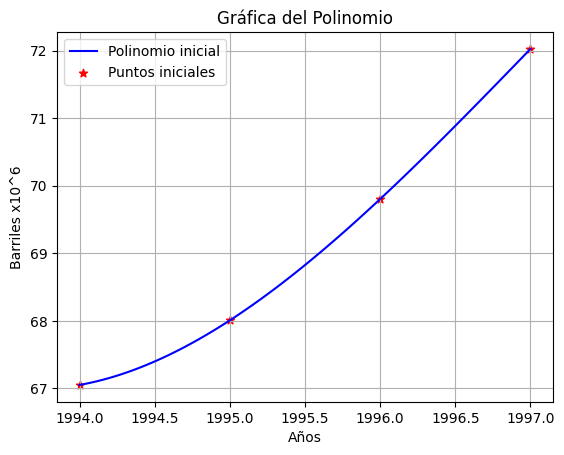

In [4]:
Pg, _ = lagrange(anio, smp) # Polinomio con todos los puntos
P, _ = lagrange(anio[:4], smp[:4]) # Tercer grado

print(f"El polinomio hallado es:\n{P}")
drawing(anio[:4], P, 'Gráfica del Polinomio')

Para estimar el resultado en 1998, solo evaluaremos el punto en el polinomio que hemos hallado.

La estimación para el año 2018: 74.258000
El error que se tuvo fue: 0.858000


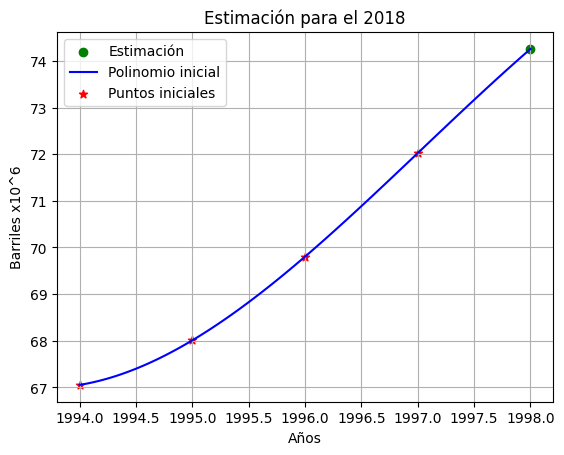

In [5]:
print(f"La estimación para el año 2018: {P(8):.6f}")
print(f"El error que se tuvo fue: {abs(smp[4] - P(8)):.6f}")
drawing(anio[0:4], P, 'Estimación para el 2018',[anio[4]])

Ahora veremos como se comporta el polinomio que hemos hallado con los demas registros respectivos de los demas años.


    La estimación para el año 1998 es: 	74.258000
    El error que se tuvo fue: 	0.858000

    La estimación para el año 1999 es: 	76.092000
    El error que se tuvo fue: 	4.029000

    La estimación para el año 2000 es: 	77.113000
    El error que se tuvo fue: 	2.444000

    La estimación para el año 2001 es: 	76.908000
    El error que se tuvo fue: 	2.421000

    La estimación para el año 2002 es: 	75.064000
    El error que se tuvo fue: 	0.999000

    La estimación para el año 2003 es: 	71.168000
    El error que se tuvo fue: 	5.609000


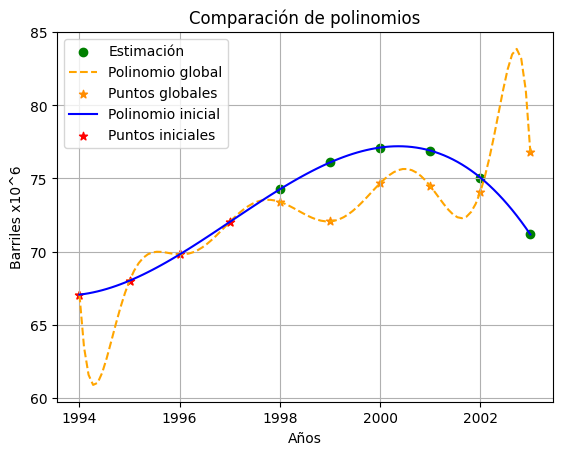

In [6]:

for i in range(4, len(anio)):
    j = anio[i]
    print(f"""
    La estimación para el año {j+1990} es: \t{P(j):.6f}
    El error que se tuvo fue: \t{abs(smp[i] - P(j)):.6f}""")
   

drawing(anio[0:4], P, 'Comparación de polinomios', list(anio[4:]), Pg)

## Conclusión
- En este ejercicio utilizamos el método de Lagrange para encontrar el polinomio de interpolación de tercer y noveno grado.
- El **polinomio inicial** de tercer grado estimó la producción para el año 2018, en el cual obtuvimos un error de *0.858000*.
- En el **polinomio global** de noveno grado, observamos que entre los puntos la gráfica oscila (*fenómeno de Runge*), a comparación del polinomio de tercer grado que tiene un ajuste suave con los datos.